# Brief Examples using dataset Naruto Shippuden Episodes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
prm={"figure.figsize":(9, 4),
'figure.dpi':150}
plt.rcParams.update(prm)
plt.rc('legend', fontsize=10)
sns.set_palette("Set2")

Here I will make some examples using the dataset  
First we will see the quantity of fillers that Naruto Shippuden has

In [3]:
#Reading the data
df=pd.read_csv("naruto.csv",encoding='cp1252')

In [4]:
#Grouping by Type and viewing the proportion 
(1/df.shape[0])*(df  .\
    groupby("Type").size())


Type
Filler                0.406
Manga Canon           0.468
Mixed Canon/Filler    0.126
dtype: float64

As you can see not even half of the episodes in the saga are  100% canonical

Text(0.5, 1.0, 'Quantity of episodes by Type')

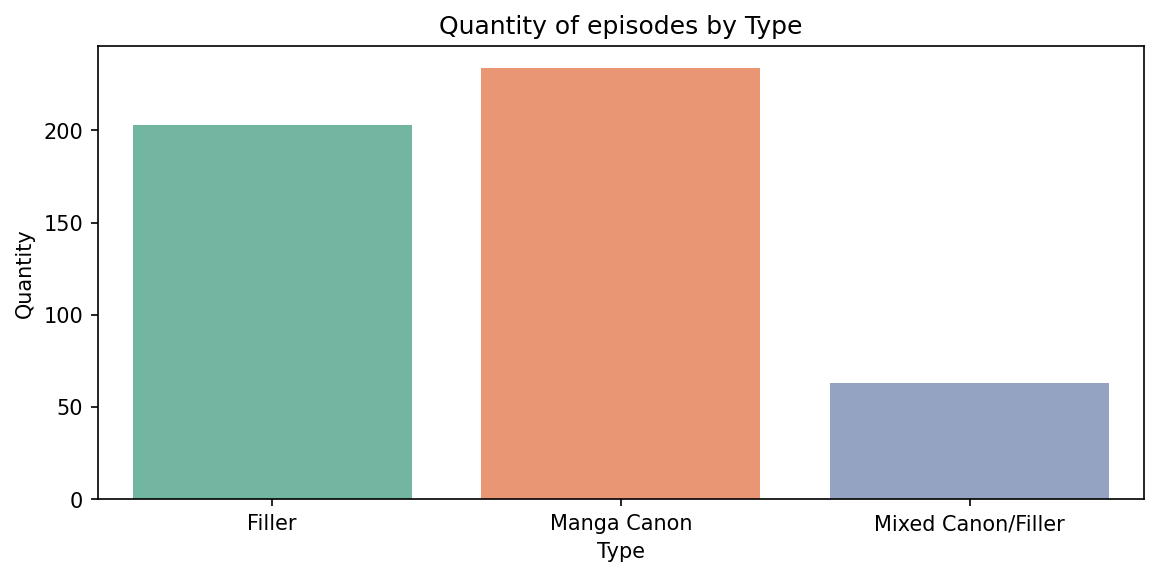

In [5]:
# Visualization of absolute values 
sns.barplot(data=df.groupby("Type",as_index=False).size(),
    x='Type', y="size")
plt.ylabel("Quantity")
plt.title("Quantity of episodes by Type")

Text(0.5, 1.0, 'Rate over time')

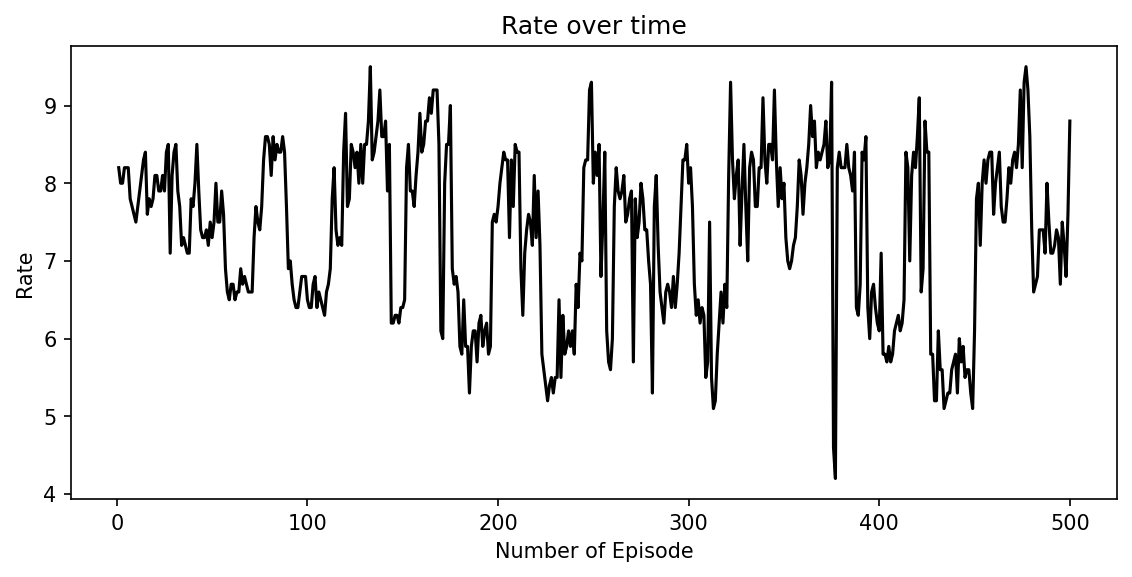

In [6]:
# Rate over time, you can see this as a time series 
sns.lineplot(data=df,x="Num_episode",y="Rate",color="black")
plt.xlabel("Number of Episode")
plt.title("Rate over time")

In [7]:
#Minimum evaluation  of all episodes
df[df.Rate==df['Rate'].min()][["Num_episode","Title"]]

,Num_episode,Title
376,377,Naruto vs. Mecha Naruto


The episode which has the lower rate is *Naruto vs. Mecha Naruto*, it's a weird filler ...

<p align="center"><img align="center" src="http://pa1.narvii.com/6434/6943988ce21f0e666c8c650956c1cae82fa16cab_00.gif" height="210px" width="350"/></p>

In [8]:
#spliting Saga for plotting
df[["Season", "Name of Season"]] = df["Saga"].str.split(' ', 1, expand=True)
seasons = df .\
    groupby("Season", as_index=False)[["Rate", "Votes"]] .\
    mean() .\
    sort_values("Rate", ascending=False)

Is clear by the following graph, that in general fillers have lower ratings

Text(0.5, 1.0, 'Rate by Seasons')

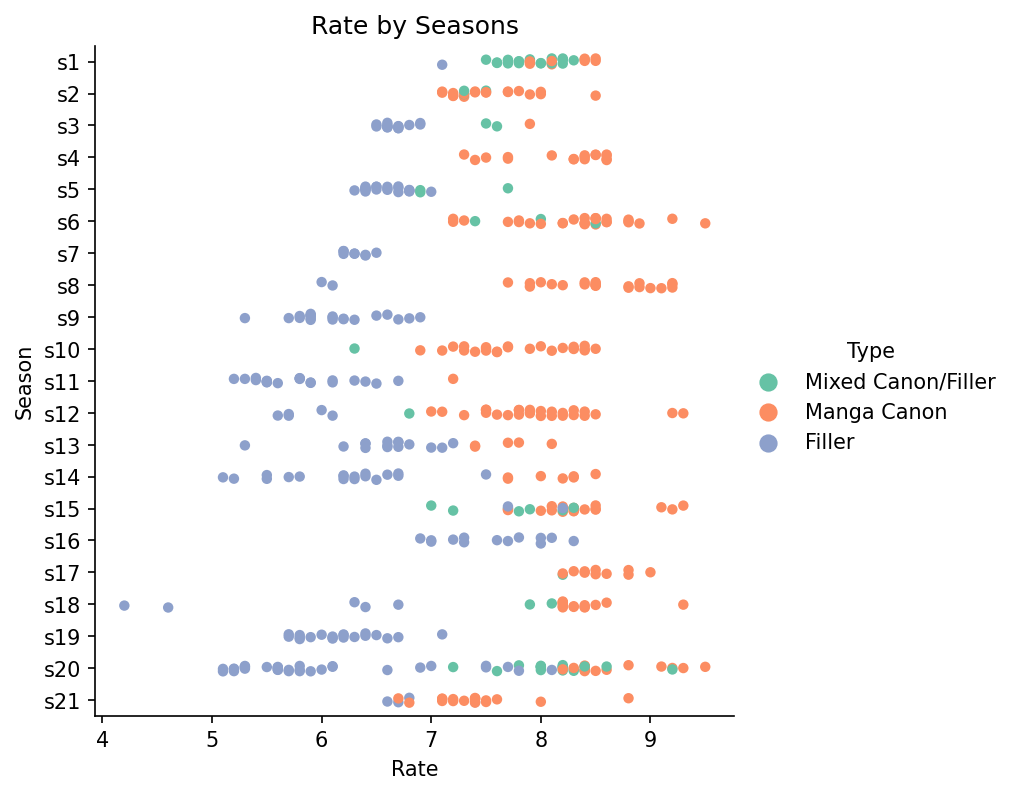

In [9]:
# Rate of all episodes by season and type
sns.catplot(data=df, x="Rate", y="Season", hue="Type")
plt.title("Rate by Seasons")

Text(0.5, 1.0, 'Mean rate by Season')

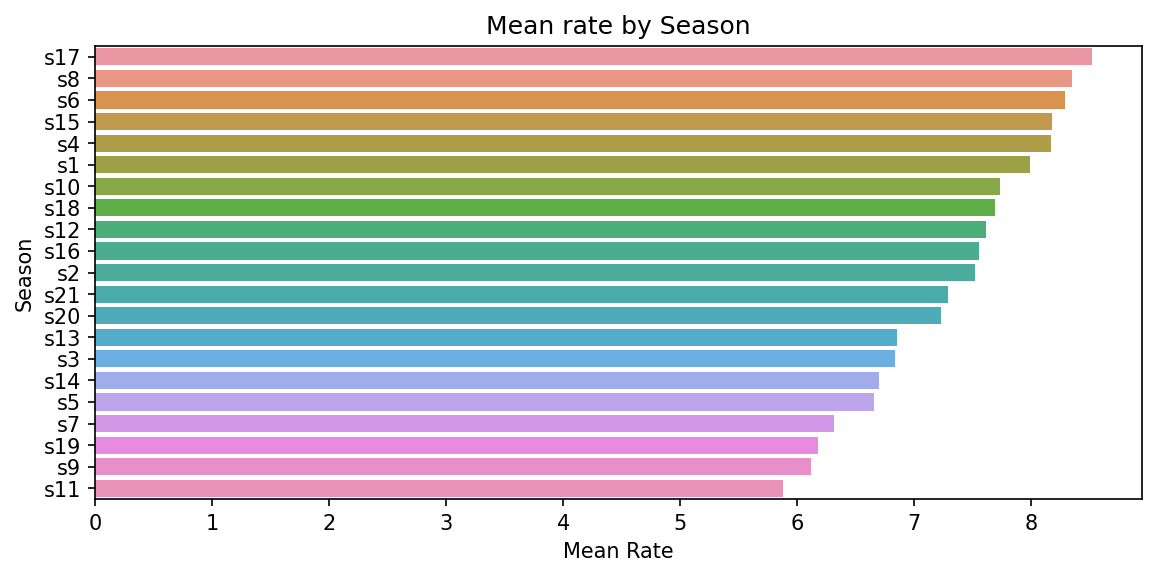

In [9]:
#Average rate by season
sns.barplot(data=seasons, x="Rate", y="Season")
plt.xlabel("Mean Rate")
plt.title("Mean rate by Season")


## The Future

This notebook is only an example, now  I believe you can explore the data by yourself!  



<p align="center"><img align="center" src="https://i.gifer.com/NLdi.gif" height="210px" width="350"/></p>

You can consult the notebook and dataset in GitHub clicking [here](https://github.com/AlissonRP/naruto_episodes)